<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [2]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [3]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [4]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [5]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [6]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [7]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [8]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [9]:
df = pd.merge(client_info, loan_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df = df.drop(['ID'], axis=1)

### Task 4: Data Prep & Start H2O

In [11]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjpvtezxe
  JVM stdout: /tmp/tmpjpvtezxe/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmpjpvtezxe/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,1 year and 1 day !!!
H2O_cluster_name:,H2O_from_python_rhyme_cl67jr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [12]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [13]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [14]:
train, test = h2o_df.split_frame(ratios=[.75])

x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

### Task 5: Run H2O AutoML

In [16]:
from h2o.automl import H2OAutoML

In [17]:
aml = H2OAutoML(max_runtime_secs=600,
               balance_classes=True,
                stopping_metric='logloss',
               project_name='Final',
               seed=1)
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 15s, sys: 1.12 s, total: 1min 16s
Wall time: 10min 8s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [18]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20210515_074437,0.93405,0.218547,0.627723,0.168787,0.254918,0.0649831
XGBoost_grid__1_AutoML_20210515_074437_model_2,0.933379,0.198738,0.626062,0.171084,0.249375,0.0621881
StackedEnsemble_AllModels_AutoML_20210515_074437,0.931061,0.21242,0.621271,0.176163,0.253232,0.0641266
GBM_grid__1_AutoML_20210515_074437_model_1,0.930784,0.201704,0.606665,0.177659,0.251832,0.0634192
XGBoost_3_AutoML_20210515_074437,0.930369,0.203516,0.610795,0.175622,0.251952,0.0634798
GBM_grid__1_AutoML_20210515_074437_model_2,0.930089,0.209219,0.610261,0.182171,0.256716,0.065903
XGBoost_grid__1_AutoML_20210515_074437_model_1,0.928558,0.205758,0.606124,0.168321,0.253912,0.0644712
XGBoost_grid__1_AutoML_20210515_074437_model_5,0.927519,0.207239,0.609817,0.183287,0.252435,0.0637236
XGBoost_grid__1_AutoML_20210515_074437_model_4,0.927387,0.212328,0.605492,0.185752,0.257009,0.0660534
XGBoost_grid__1_AutoML_20210515_074437_model_3,0.925617,0.212398,0.595864,0.184648,0.258338,0.0667385


In [19]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

In [20]:
metalearner.varimp()

[('XGBoost_grid__1_AutoML_20210515_074437_model_2',
  0.7499630630443028,
  1.0,
  0.49980783946638313),
 ('GBM_grid__1_AutoML_20210515_074437_model_1',
  0.504636965093308,
  0.6728824257622104,
  0.3363119114351093),
 ('DeepLearning_grid__2_AutoML_20210515_074437_model_1',
  0.17817196578820113,
  0.23757432141384796,
  0.11874150829854743),
 ('XRT_1_AutoML_20210515_074437',
  0.042619046084205164,
  0.05682819352622906,
  0.028403176627122044),
 ('DRF_1_AutoML_20210515_074437',
  0.02511176091642795,
  0.033483996951119865,
  0.01673556417283818),
 ('GLM_1_AutoML_20210515_074437', 0.0, 0.0, 0.0)]

 ### Task 7: Base Learner XGBoost Model Exploration

In [21]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20210515_074437_model_2')

In [22]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.062232784120754885
RMSE: 0.24946499578248424
LogLoss: 0.19783475052174126
Mean Per-Class Error: 0.12345754797036546
AUC: 0.9369766859121752
AUCPR: 0.6374223540215797
Gini: 0.8739533718243504

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2994690736134847: 


,,no,yes,Error,Rate
0,no,9291.0,683.0,0.0685,(683.0/9974.0)
1,yes,384.0,970.0,0.2836,(384.0/1354.0)
2,Total,9675.0,1653.0,0.0942,(1067.0/11328.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.299469,0.645161,212.0
1,max f2,0.134818,0.753175,286.0
2,max f0point5,0.432047,0.627208,166.0
3,max accuracy,0.432047,0.910840,166.0
4,max precision,0.984078,1.000000,0.0
5,max recall,0.000229,1.000000,399.0
6,max specificity,0.984078,1.000000,0.0
7,max absolute_mcc,0.299469,0.595391,212.0
8,max min_per_class_accuracy,0.146741,0.872869,280.0
9,max mean_per_class_accuracy,0.093503,0.876542,309.0



Gains/Lift Table: Avg response rate: 11.95 %, avg score: 11.57 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010064,0.884685,6.751769,6.751769,0.807018,0.929942,0.807018,0.929942,0.067947,0.067947,575.176864,575.176864
1,,2,0.020039,0.814832,6.293251,6.523520,0.752212,0.849920,0.779736,0.890107,0.062777,0.130724,529.325107,552.351980
2,,3,0.030014,0.751550,5.997098,6.348562,0.716814,0.780950,0.758824,0.853828,0.059823,0.190547,499.709808,534.856199
3,,4,0.040078,0.689077,5.577548,6.154959,0.666667,0.723340,0.735683,0.821062,0.056130,0.246677,457.754801,515.495936
4,,5,0.050053,0.638300,5.256716,5.975944,0.628319,0.665041,0.714286,0.789968,0.052437,0.299114,425.671560,497.594429
5,,6,0.100018,0.453315,4.789202,5.383097,0.572438,0.542695,0.643425,0.666441,0.239291,0.538405,378.920200,438.309686
6,,7,0.150071,0.285753,3.733121,4.832781,0.446208,0.367366,0.577647,0.566691,0.186854,0.725258,273.312076,383.278130
7,,8,0.200035,0.174415,2.291131,4.197929,0.273852,0.225607,0.501765,0.481495,0.114476,0.839734,129.113059,319.792945
8,,9,0.300053,0.065111,1.092865,3.162908,0.130627,0.108403,0.378052,0.357131,0.109306,0.949040,9.286466,216.290785
9,,10,0.399982,0.030362,0.310411,2.450256,0.037102,0.044713,0.292871,0.279078,0.031019,0.980059,-68.958876,145.025586


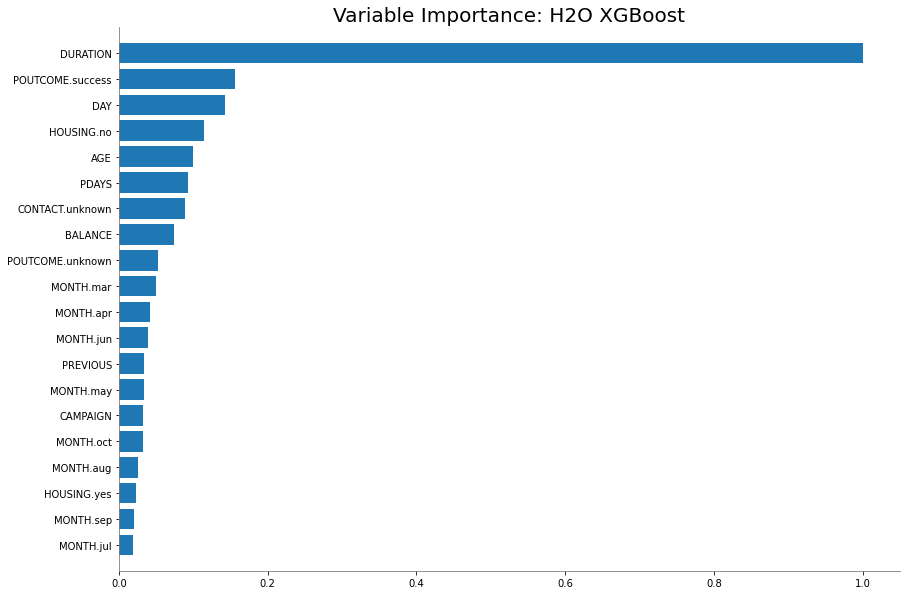

In [23]:
model.varimp_plot(num_of_features=20)